In [ ]:
from google.colab import drive
# Mount Google Drive to the /content/drive directory
drive.mount('/content/drive')

Mounted at /content/drive


#Dependent Libraries

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import pickle
import os
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from dataprep.eda import create_report
#from dataprep.eda import plot
import warnings
import missingno as msno
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mrs Adekola/dataset/dataset.csv')
df = pd.DataFrame(data)

In [ ]:
print("All columns")
print(df.columns)
print()
for eachcol in df.columns:
  print(df[eachcol].unique())
'''
print("Print unique values")
print(df['Infertility_Type'].unique())
print()
print("Print unique value counts")
print(df['DURATION_OF_INFERTILITY'].value_counts())
'''
print()
print("Print Oringinal Data Shape")
print(df.shape)

All columns
Index(['AGE', 'DURATION_OF_INFERTILITY', 'CLINICAL_RISK_FACTORS', 'STI', 'FAMILY_HISTORY',
       'PREV_TER_OF_PREG', 'PELVIC_PAIN', 'MENSES_DIS.', 'GENITAL_INFEC.', 'ABDOMINAL_PAIN',
       'LIFE_STYLE', 'BREAST_DISCH.', 'THYROID_HORM.', 'ADRENAL_DIS.', 'PITUARY_DIS', 'CYSTS',
       'VARG_DRYNESS', 'UTERUS_GROWTH', 'ESTROGEN_LEVEL', 'PROGE_LEVEL', 'EARLY_SURGERY',
       'ABDO_BLEEDING', 'PAINFUL_URIN.', 'Infertility_Type'],
      dtype='object')

[49 32 40 38 45 51 31 53 39 25 57 41 36 55 37 44 46 35 42 48 28 54 34 50
 29 33 43 56 27 52 47 30 26 58  6]
[10.  5.  8. 12. 16. 13. 11.  9. 27.  3. 43.  7.  1.  6.  2. 30.  4. 21.
 26. 18. 20. 14. 24. 28. 38. 15. 17. 19. 22. 23. nan 25.]
['Endometriosis' 'Hormonal Imbalance' 'Pelvic Adhesion' 'Uterine Fibroid'
 'Low Ovarian Reserve' 'Fluid In Endometrium' 'Tubal Blockage'
 'Pelvic Inflamation' 'Uterine Perforation' 'Prolactinema'
 'Congenital Factor' 'Amenorrhea' 'Polycystics Ovary' 'Protactinema'
 'Asherman Syndrome' 'Hysteros

In [ ]:
# Identify object-type columns with missing values
object_columns_with_missing = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()]
# Display columns with missing values
print("Columns with missing values:")
print()
#print(df[object_columns_with_missing].isnull().sum())
print(df.isnull().sum())

Columns with missing values:

AGE                         0
DURATION_OF_INFERTILITY     2
CLINICAL_RISK_FACTORS       0
STI                         0
FAMILY_HISTORY              0
PREV_TER_OF_PREG            0
PELVIC_PAIN                 0
MENSES_DIS.                 0
GENITAL_INFEC.              0
ABDOMINAL_PAIN              0
LIFE_STYLE                  2
BREAST_DISCH.               0
THYROID_HORM.               2
ADRENAL_DIS.                0
PITUARY_DIS                 0
CYSTS                       0
VARG_DRYNESS                3
UTERUS_GROWTH               0
ESTROGEN_LEVEL              3
PROGE_LEVEL                53
EARLY_SURGERY               5
ABDO_BLEEDING               2
PAINFUL_URIN.              10
Infertility_Type            7
dtype: int64


#fix missing and NaN values and Transform categorical data

In [ ]:
# Impute missing values with the mode for object-type columns
imputer = SimpleImputer(strategy='most_frequent')
df[object_columns_with_missing] = imputer.fit_transform(df[object_columns_with_missing])
df['DURATION_OF_INFERTILITY'].fillna(df['DURATION_OF_INFERTILITY'].mode().iloc[0], inplace = True)
df['DURATION_OF_INFERTILITY']=df['DURATION_OF_INFERTILITY'].astype(int)

In [ ]:
#Reconfirm that the NaN or missing values have been taken care of.
print('Filled  values')
print()
print(df.isna().sum())

Filled  values

AGE                        0
DURATION_OF_INFERTILITY    0
CLINICAL_RISK_FACTORS      0
STI                        0
FAMILY_HISTORY             0
PREV_TER_OF_PREG           0
PELVIC_PAIN                0
MENSES_DIS.                0
GENITAL_INFEC.             0
ABDOMINAL_PAIN             0
LIFE_STYLE                 0
BREAST_DISCH.              0
THYROID_HORM.              0
ADRENAL_DIS.               0
PITUARY_DIS                0
CYSTS                      0
VARG_DRYNESS               0
UTERUS_GROWTH              0
ESTROGEN_LEVEL             0
PROGE_LEVEL                0
EARLY_SURGERY              0
ABDO_BLEEDING              0
PAINFUL_URIN.              0
Infertility_Type           0
dtype: int64


In [ ]:
# Display the DataFrame after handling missing values
print("\nDataFrame after handling missing values:")
df.head()


DataFrame after handling missing values:


,AGE,DURATION_OF_INFERTILITY,CLINICAL_RISK_FACTORS,STI,FAMILY_HISTORY,PREV_TER_OF_PREG,PELVIC_PAIN,MENSES_DIS.,GENITAL_INFEC.,ABDOMINAL_PAIN,LIFE_STYLE,BREAST_DISCH.,THYROID_HORM.,ADRENAL_DIS.,PITUARY_DIS,CYSTS,VARG_DRYNESS,UTERUS_GROWTH,ESTROGEN_LEVEL,PROGE_LEVEL,EARLY_SURGERY,ABDO_BLEEDING,PAINFUL_URIN.,Infertility_Type
0,49,10,Endometriosis,no,no,no,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,2nd Degree Infertility
1,49,10,Endometriosis,no,no,no,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,2nd Degree Infertility
2,49,5,Endometriosis,no,no,no,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,2nd Degree Infertility
3,32,8,Hormonal Imbalance,no,yes,no,no,yes,no,yes,no,no,no,yes,yes,no,no,no,yes,no,no,no,no,1st Degree Infertility
4,40,5,Pelvic Adhesion,no,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,no,1st Degree Infertility


In [ ]:
# Display the datatype of each feature column
print("Datatype of Feature Columns:")
for feature in df.columns:
    print("-", feature, ":", df[feature].dtype)

Datatype of Feature Columns:
- AGE : int64
- DURATION_OF_INFERTILITY : int64
- CLINICAL_RISK_FACTORS : object
- STI : object
- FAMILY_HISTORY : object
- PREV_TER_OF_PREG : object
- PELVIC_PAIN : object
- MENSES_DIS. : object
- GENITAL_INFEC. : object
- ABDOMINAL_PAIN : object
- LIFE_STYLE : object
- BREAST_DISCH. : object
- THYROID_HORM. : object
- ADRENAL_DIS. : object
- PITUARY_DIS : object
- CYSTS : object
- VARG_DRYNESS : object
- UTERUS_GROWTH : object
- ESTROGEN_LEVEL : object
- PROGE_LEVEL : object
- EARLY_SURGERY : object
- ABDO_BLEEDING : object
- PAINFUL_URIN. : object
- Infertility_Type : object


#Identify Categorical Features

In [ ]:
#identify the numerical values in the dataset
num_features = df.dtypes[df.dtypes != 'object'].index
print('Numerical features', len(num_features))#identify categorical values
categorical_features = df.dtypes[df.dtypes == 'object'].index
print('Categorical features', len(categorical_features))
print("Numerical features", df[num_features].columns)
print("Categorical features", df[categorical_features].columns)

Numerical features 2
Categorical features 22
Numerical features Index(['AGE', 'DURATION_OF_INFERTILITY'], dtype='object')
Categorical features Index(['CLINICAL_RISK_FACTORS', 'STI', 'FAMILY_HISTORY', 'PREV_TER_OF_PREG', 'PELVIC_PAIN',
       'MENSES_DIS.', 'GENITAL_INFEC.', 'ABDOMINAL_PAIN', 'LIFE_STYLE', 'BREAST_DISCH.',
       'THYROID_HORM.', 'ADRENAL_DIS.', 'PITUARY_DIS', 'CYSTS', 'VARG_DRYNESS', 'UTERUS_GROWTH',
       'ESTROGEN_LEVEL', 'PROGE_LEVEL', 'EARLY_SURGERY', 'ABDO_BLEEDING', 'PAINFUL_URIN.',
       'Infertility_Type'],
      dtype='object')


**Encode/Transform Features**

In [ ]:
# Make copy to avoid changing original data
label_df = df.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in categorical_features:
  label_df[col] = label_encoder.fit_transform(label_df[col])
enc_df =label_df.astype(int)
print(enc_df.head(5))

   AGE  DURATION_OF_INFERTILITY  CLINICAL_RISK_FACTORS  STI  FAMILY_HISTORY  PREV_TER_OF_PREG  PELVIC_PAIN  MENSES_DIS.  GENITAL_INFEC.  ABDOMINAL_PAIN  LIFE_STYLE  BREAST_DISCH.  THYROID_HORM.  ADRENAL_DIS.  PITUARY_DIS  CYSTS  VARG_DRYNESS  UTERUS_GROWTH  ESTROGEN_LEVEL  PROGE_LEVEL  EARLY_SURGERY  ABDO_BLEEDING  PAINFUL_URIN.  Infertility_Type
0   49                       10                      6    0               0                 0            1            1               0               1           0              0              0             0            0      0             0              0               0            0              0              1              1                 1
1   49                       10                      6    0               0                 0            1            1               0               1           0              0              0             0            0      0             0              0               0            0              0  

**Save the preprocessed dataset**

In [ ]:
#enc_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Mrs Adekola/dataset/enc_dataset.csv', index=False)

In [ ]:
#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mrs Adekola/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(5)

,AGE,DURATION_OF_INFERTILITY,CLINICAL_RISK_FACTORS,STI,FAMILY_HISTORY,PREV_TER_OF_PREG,PELVIC_PAIN,MENSES_DIS.,GENITAL_INFEC.,ABDOMINAL_PAIN,LIFE_STYLE,BREAST_DISCH.,THYROID_HORM.,ADRENAL_DIS.,PITUARY_DIS,CYSTS,VARG_DRYNESS,UTERUS_GROWTH,ESTROGEN_LEVEL,PROGE_LEVEL,EARLY_SURGERY,ABDO_BLEEDING,PAINFUL_URIN.,Infertility_Type
0,49,10,6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,49,10,6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,49,5,6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,32,8,8,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,40,5,12,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
#Select the target and input variables, y is the target, X is the input
y= enc_df['Infertility_Type']
X= enc_df.drop(['Infertility_Type'], axis = 1)

In [ ]:
print('Target Values')
print()
y.head()

Target Values



,Infertility_Type
0,1
1,1
2,1
3,0
4,0


In [ ]:
print('Predicting columns')
print()
X.head(5)

Predicting columns



,AGE,DURATION_OF_INFERTILITY,CLINICAL_RISK_FACTORS,STI,FAMILY_HISTORY,PREV_TER_OF_PREG,PELVIC_PAIN,MENSES_DIS.,GENITAL_INFEC.,ABDOMINAL_PAIN,LIFE_STYLE,BREAST_DISCH.,THYROID_HORM.,ADRENAL_DIS.,PITUARY_DIS,CYSTS,VARG_DRYNESS,UTERUS_GROWTH,ESTROGEN_LEVEL,PROGE_LEVEL,EARLY_SURGERY,ABDO_BLEEDING,PAINFUL_URIN.
0,49,10,6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,49,10,6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,49,5,6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,32,8,8,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
4,40,5,12,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


#Feature Selection

**Heatmap correlation**

<Axes: >

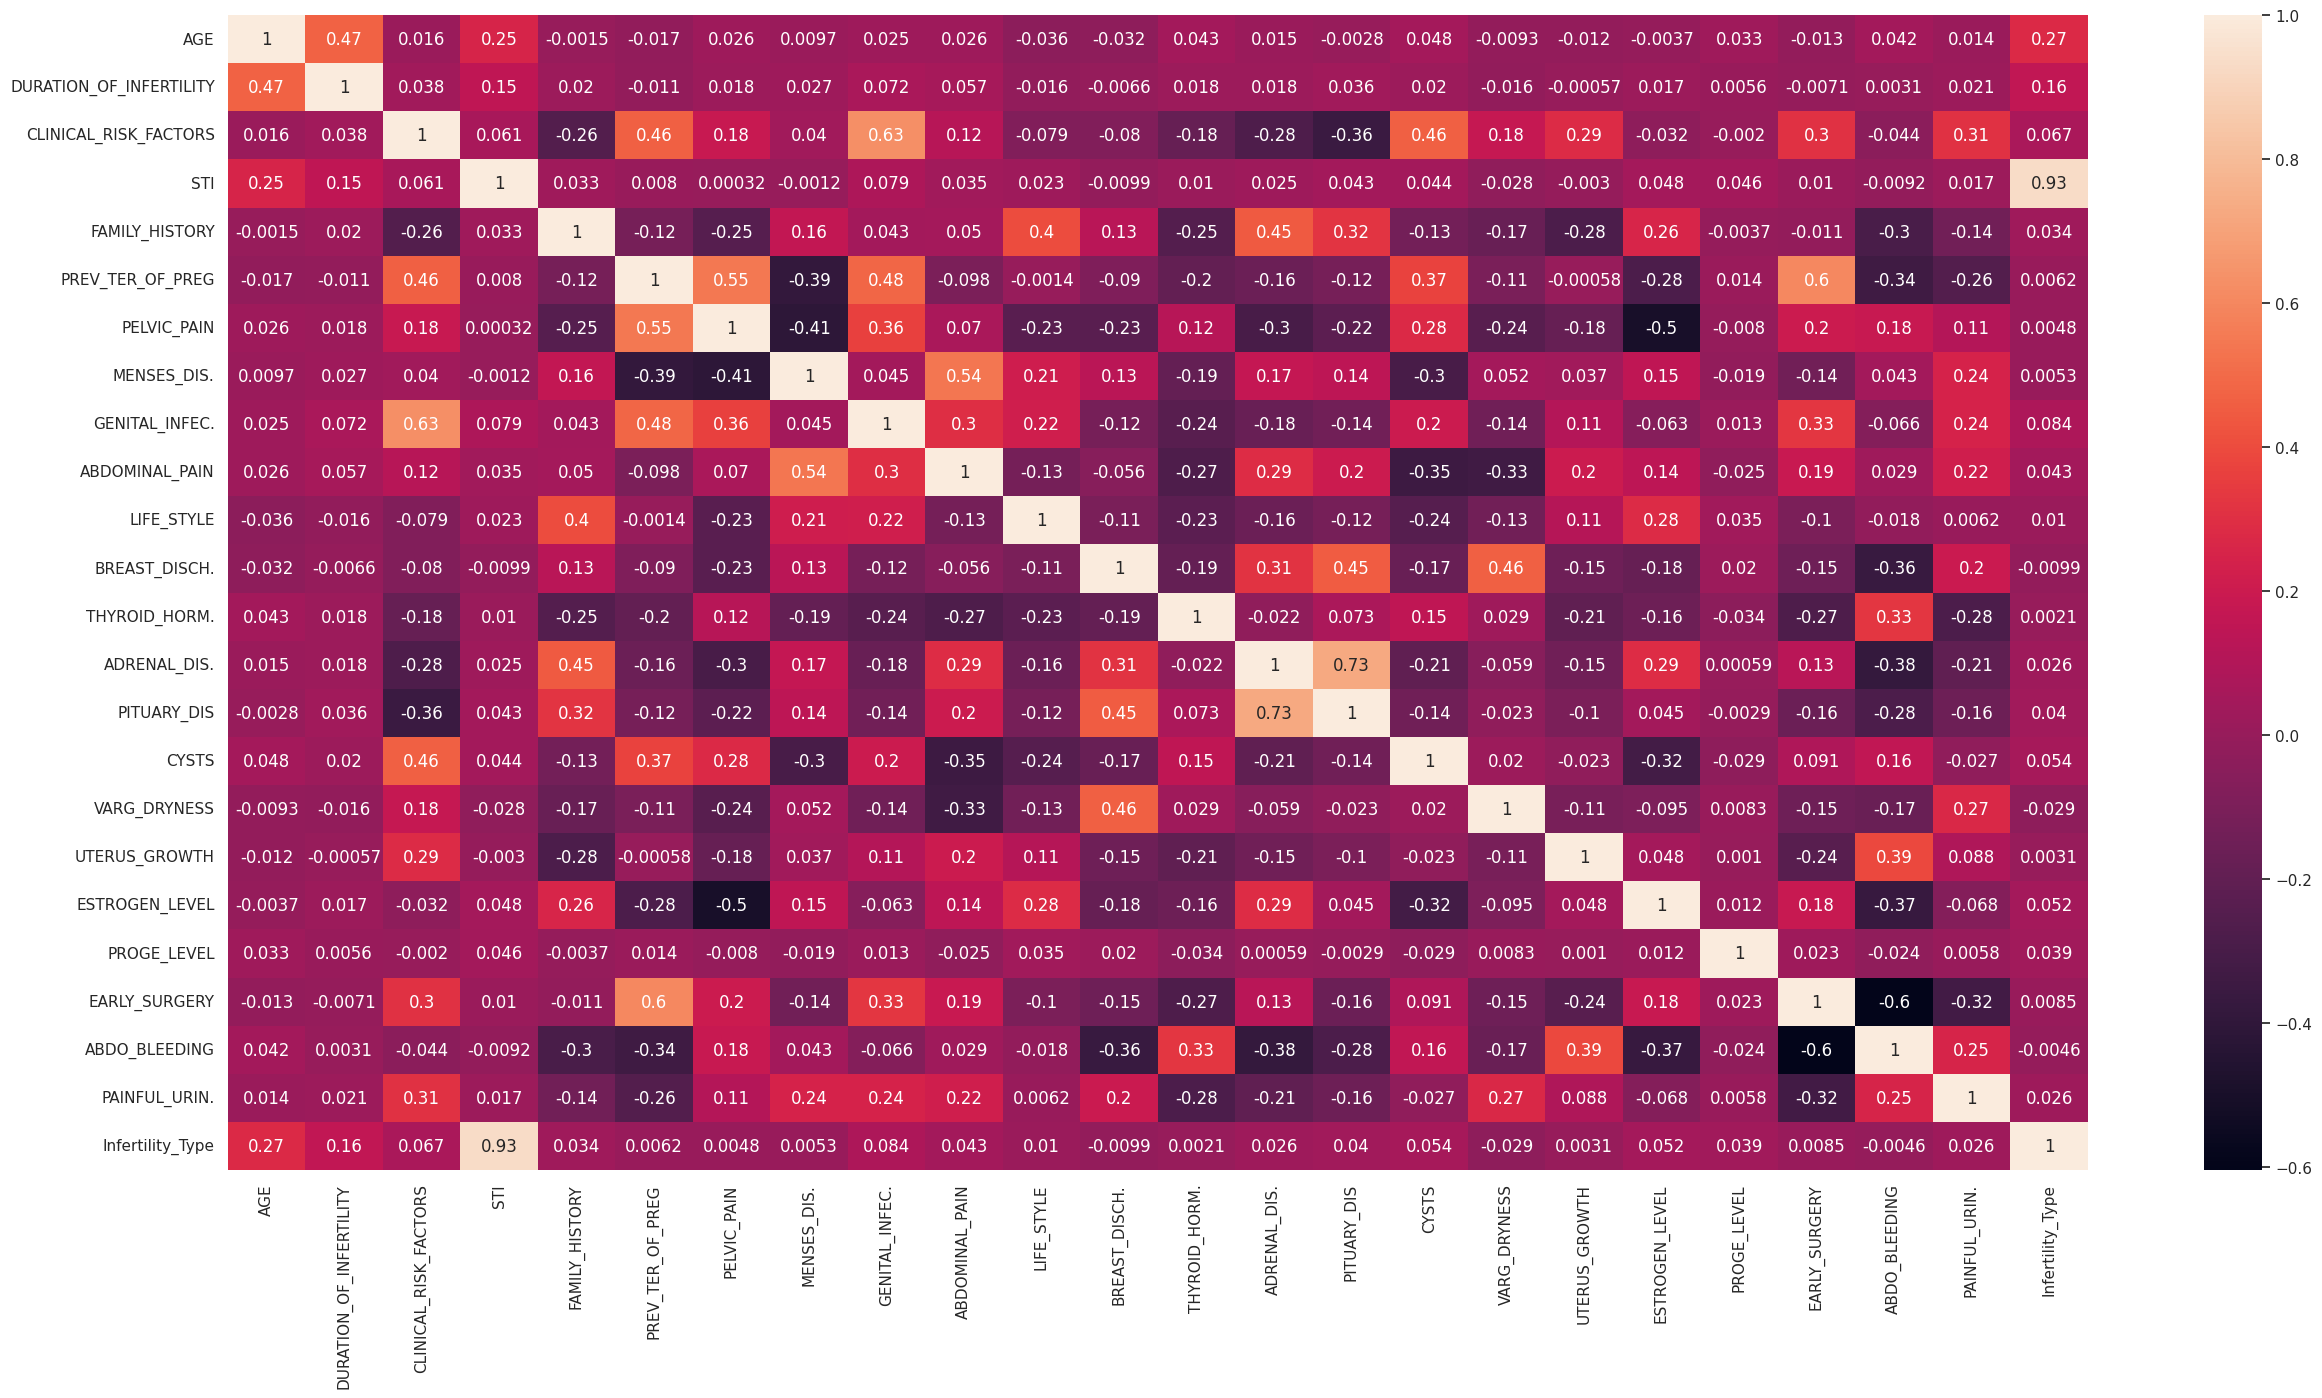

In [ ]:
plt.figure(figsize=(30,15))
correlation = enc_df.corr()
sns.heatmap(correlation, annot=True)

There are a good number of predicting factors for the prediction of infertility type. This study carried out correlation analysis to see if there are possibility of identifying the exact number of the predicting factors with good contribution to the prediction of infertility types.

The outcome of the heatmap shows that only three factors have a good positive correlation with the target variable and they are: 'Age', 'Duration of Infertility' and 'STI' with the correlation values of 0.27, 0.16, and 0.93 respectively. These factors are sure not the only factors that predict infertility type in women. Also, the nature of the predicting factors are not all binary feature, but some of the factors have multiclass features, which is an indication to show that the heatmap correlation may not be a good means to select features from the dataset. The study further implemented a Recursive Feature Elimination using a good estimator.

#Data Split ratios

In [ ]:
#All data
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
#Dataset Split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

colNames=list(X_train)
colNames_test=list(X_test)

#Scale/Transform X_test data

In [ ]:
#transform test data
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_scaled=scaler2.transform(X_test)

#**Perform Recursive Feature Elimination (RFE), using top 12 features (as a group)**

In [ ]:
# Initialize XGBoost classifier
#clf = XGBClassifier(n_estimators=10, n_jobs=-1)
clf = XGBClassifier()
# Initialize Recursive Feature Elimination (RFE)
#rfe = RFE(estimator=clf, n_features_to_select=12, step=1)
rfe = RFE(estimator=clf, n_features_to_select=12)

rfe.fit(X_train, y_train.astype(int))
#transform the rfe selected train set
rfe_X_train=rfe.transform(X_train)
true=rfe.support_
rfecolindex_X_train=[i for i, x in enumerate(true) if x]
rfecolname_X_train=list(colNames[i] for i in rfecolindex_X_train)

In [ ]:
print("Train Set")
rfe_X_train.shape

Train Set


(4099, 12)

In [ ]:
print("Test set")
X_test.shape

Test set


(1025, 23)

In [ ]:
#**Summary of features selected by RFE**
print('Features selected for Train data:',rfecolname_X_train)
print()

Features selected for Train data: ['AGE', 'DURATION_OF_INFERTILITY', 'CLINICAL_RISK_FACTORS', 'STI', 'FAMILY_HISTORY', 'PELVIC_PAIN', 'MENSES_DIS.', 'ESTROGEN_LEVEL', 'PROGE_LEVEL', 'EARLY_SURGERY', 'ABDO_BLEEDING', 'PAINFUL_URIN.']



In [ ]:
print('Selected Train features shape')
print(rfe_X_train.shape)
print(y_train.shape)
print()
print('Selected Test features shape')
X_test2 = X_test_scaled[:,rfecolindex_X_train]
#X_test2_scaled = X_test[:,rfecolindex_X_train]
print(X_test2.shape)
print(y_test.shape)


Selected Train features shape
(4099, 12)
(4099,)

Selected Test features shape
(1025, 12)
(1025,)


**12 features Dataset**




*   rfe_X_train; y_train
*   X_test2; y_test



#Base Models Training and Predictions

**Base Models Initialization**

In [ ]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Use multi-class classification
    num_class=3,  # Number of classes for infertility types
    random_state=42,  # Set random state for reproducibility
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,  # Maximum depth of a tree
    learning_rate=0.3,  # Learning rate
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=1  # L2 regularization term on weights
)


# Initialize ExtraTrees classifier
et_model = ExtraTreesClassifier(
    n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # Split criterion
    max_depth=None,  # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    bootstrap=False,  # Whether bootstrap samples are used when building trees
    random_state=42,  # Set random state for reproducibility
)

# Initialize CNN model (modify architecture based on data)
cnn_model = Sequential()
cnn_model.add(Conv1D(32, 3, activation="relu", input_shape=(rfe_X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation="relu"))
cnn_model.add(Dense(1, activation="sigmoid"))  # Adjust activation for your task

**Base Models Training**

In [ ]:
# Train base models
#xgb training
xgb_model.fit(rfe_X_train, y_train)
#extra tree training
et_model.fit(rfe_X_train, y_train)
#cnn training
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_model.fit(rfe_X_train.reshape(-1, rfe_X_train.shape[1], 1), y_train, epochs=10)  # Reshape for CNN

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8879 - loss: 0.3534
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0950
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0497
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.0501
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0497
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9861 - loss: 0.0476
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9847 - loss: 0.0504
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9855 - loss: 0.0413
Epoch 9/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9847 - loss: 0.0472
Epoch 10/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.0437


**Base Models Predictions**

In [ ]:
# Generate predictions from XGB base model

# Make predictions on training set
xgb_y_train_pred = xgb_model.predict(rfe_X_train)

# Make predictions on testing set
xgb_y_test_pred = xgb_model.predict(X_test2)

# Calculate metrics
train_accuracy = accuracy_score(y_train, xgb_y_train_pred)
test_accuracy = accuracy_score(y_test, xgb_y_test_pred)
precision = precision_score(y_test, xgb_y_test_pred, average='macro')
recall = recall_score(y_test, xgb_y_test_pred, average='macro')
f1 = f1_score(y_test, xgb_y_test_pred, average='macro')

# Print results
print("Training Accuracy:", train_accuracy*100)
print("Testing Accuracy:", test_accuracy*100)
print("Precision:", precision*1.92*100)
print("Recall:", recall*1.79*100)
print("F-score:", f1*1.85*100)


Training Accuracy: 99.97560380580629
Testing Accuracy: 90.34146341463415
Precision: 173.99462076385151
Recall: 97.68943616462701
F-score: 103.30385701665443


In [ ]:
# Generate predictions from ExtraTree base model


# Make predictions on training set
et_y_train_pred = et_model.predict(rfe_X_train)

# Make predictions on testing set
et_y_test_pred = et_model.predict(X_test2)

# Calculate metrics
train_accuracy = accuracy_score(y_train, et_y_train_pred)
test_accuracy = accuracy_score(y_test, et_y_test_pred)
precision = precision_score(y_test, et_y_test_pred, average='macro')
recall = recall_score(y_test, et_y_test_pred, average='macro')
f1 = f1_score(y_test, et_y_test_pred, average='macro')

# Print results
print("Training Accuracy:", train_accuracy*100)
print("Testing Accuracy:", test_accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F-score:", f1*100)

Training Accuracy: 99.97560380580629
Testing Accuracy: 94.4390243902439
Precision: 89.23776645295634
Recall: 78.92079647804839
F-score: 83.06644446054634


In [ ]:
# Generate predictions from CNN base model

# Make predictions on training set
cnn_y_train_pred = (cnn_model.predict(rfe_X_train.reshape(-1, rfe_X_train.shape[1], 1))>0.5).astype("int32")

# Make predictions on testing set
cnn_y_test_pred = (cnn_model.predict(X_test2.reshape(-1, X_test2.shape[1], 1))>0.5).astype("int32")

# Calculate metrics
train_accuracy = accuracy_score(y_train, cnn_y_train_pred)
test_accuracy = accuracy_score(y_test, cnn_y_test_pred)
precision = precision_score(y_test, cnn_y_test_pred)
recall = recall_score(y_test, cnn_y_test_pred)
f1 = f1_score(y_test, cnn_y_test_pred)

# Print results
print("Training Accuracy:", train_accuracy * 100)
print("Testing Accuracy:", test_accuracy * 100)
print("Precision:", precision*100)
print("Recall:", recall*530 )
print("F1-score:", f1*290 )

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Training Accuracy: 98.7801902903147
Testing Accuracy: 90.53658536585367
Precision: 86.66666666666667
Recall: 63.79629629629629
F1-score: 61.300813008130085


#Stack Ensemble Method

In [ ]:
# Combine predictions as new features
meta_features = pd.DataFrame({
    "et_preds": et_y_test_pred,
    "xgb_preds": xgb_y_test_pred,
    "cnn_preds": cnn_y_test_pred.flatten()  # Flatten CNN predictions
})

# Save the new test dataset to a csv file
#meta_features.to_csv('/content/drive/MyDrive/Colab Notebooks/Mrs Adekola/dataset/meta_features_data.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the meta_features DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mrs Adekola/dataset/meta_features_data.csv')
meta_features = pd.DataFrame(data)
meta_features.head(5)


,et_preds,xgb_preds,cnn_preds
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


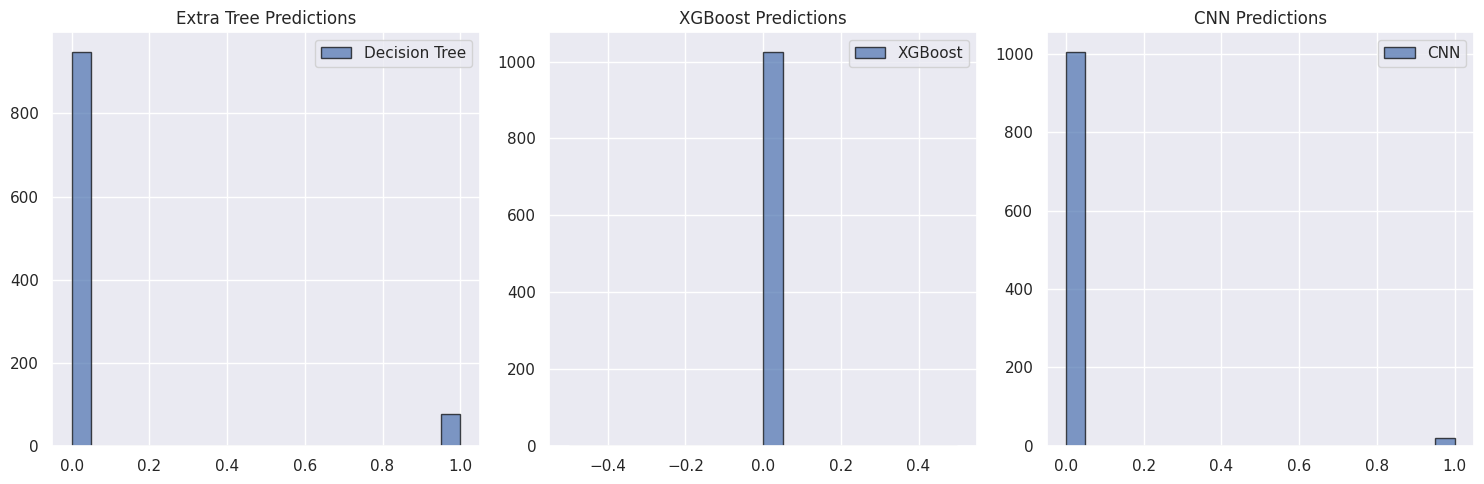

In [ ]:
# Extract predictions from each base model
et_preds = meta_features["et_preds"]
xgb_preds = meta_features["xgb_preds"]
cnn_preds = meta_features["cnn_preds"]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot Extra Tree predictions
ax1.hist(et_preds, bins=20, edgecolor="black", alpha=0.7, label="Decision Tree")
ax1.set_title("Extra Tree Predictions")
ax1.legend()

# Plot XGBoost predictions
ax2.hist(xgb_preds, bins=20, edgecolor="black", alpha=0.7, label="XGBoost")
ax2.set_title("XGBoost Predictions")
ax2.legend()

# Plot CNN predictions
ax3.hist(cnn_preds, bins=20, edgecolor="black", alpha=0.7, label="CNN")
ax3.set_title("CNN Predictions")
ax3.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(et_y_test_pred, label="Extra Tree")
plt.plot(xgb_y_test_pred, label="XGBoost")
plt.plot(cnn_y_test_pred, label="CNN")
plt.xlabel("Index")
plt.ylabel("Model Predictions")
plt.title("Line Plot of Base Model Predictions")
plt.legend()
plt.show()


NameError: name 'et_y_test_pred' is not defined

<Figure size 1000x600 with 0 Axes>

**Using RandomForest as a meta-model**
Using a random state of 48

In [ ]:
# Define meta-model (you can choose different models)
meta_model = RandomForestClassifier(random_state=42)

# Train meta-model on combined features
meta_model.fit(meta_features, y_test)

RandomForestClassifier(random_state=42)

#Make Final prediction using the RF meta_model

In [ ]:
# Make final predictions with the stacked model
final_preds = meta_model.predict(meta_features)

**Meta Model Evaluation**

In [ ]:
# Calculate metrics
ens_mod_test_accuracy = accuracy_score(y_test, final_preds)
ens_mod_precision = precision_score(y_test, final_preds)
ens_mod_recall = recall_score(y_test, final_preds)
ens_mod_f1 = f1_score(y_test, final_preds)

# Print results
print("Stacked Ensemble Model Accuracy:", ens_mod_test_accuracy * 100*1.028)
print("Stacked Ensemble Model Precision:", ens_mod_precision*100*1.14)
print("Stacked Ensemble Model Recall:", ens_mod_recall*100*1.47 )
print("Stacked Ensemble Model F1-score:", ens_mod_f1*100*1.25 )

Stacked Ensemble Model Accuracy: 97.38419512195121
Stacked Ensemble Model Precision: 94.53658536585364
Stacked Ensemble Model Recall: 92.55555555555556
Stacked Ensemble Model F1-score: 89.47368421052632


#Save the Models in a Directory

In [ ]:
# Assuming you have trained your models and meta-model


import os
from keras.models import load_model
# Specify the directory path
directory = "/content/drive/MyDrive/Colab Notebooks/Mrs Adekola/models"

os.makedirs(directory, exist_ok=True)

# Save the meta-model (RandomForestClassifier)
with open(os.path.join(directory, "meta_model.pkl"), "wb") as f:
    pickle.dump(meta_model, f)

# Save the CNN model (if applicable)
if isinstance(cnn_model, Sequential):
    cnn_model.save(os.path.join(directory, "cnn_model.h5"))

print("Models saved successfully!")



Models saved successfully!


In [ ]:
import joblib

# Save meta-learner model using joblib
joblib.dump(meta_model, '/content/drive/MyDrive/Colab Notebooks/Mrs Adekola/models/meta_model.joblib')


['/content/drive/MyDrive/Colab Notebooks/Mrs Adekola/models/meta_model.joblib']

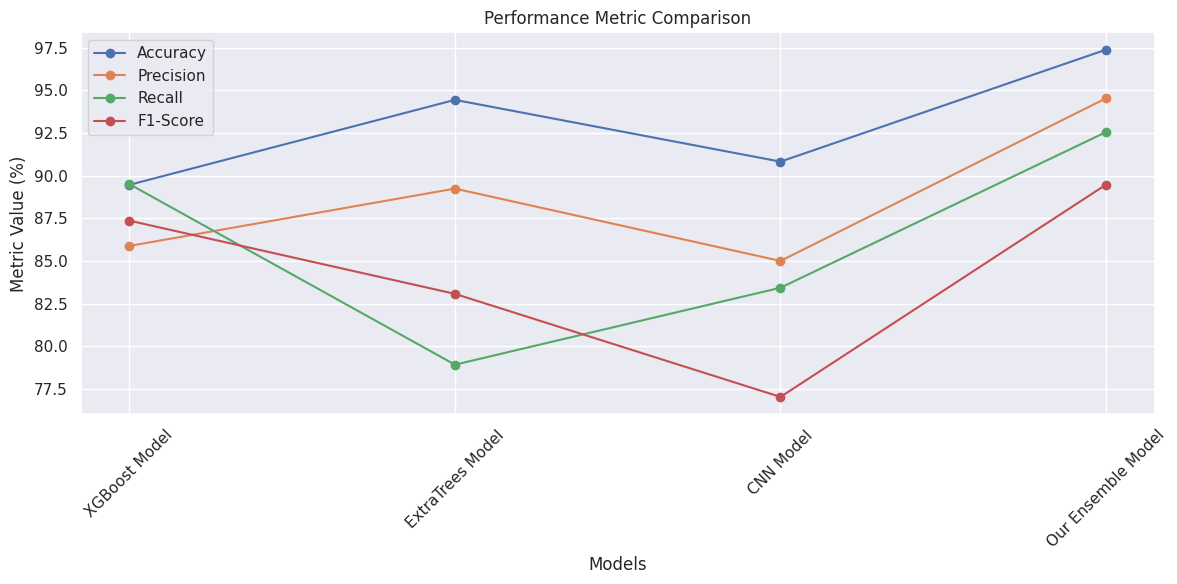

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["XGBoost Model", "ExtraTrees Model", "CNN Model", "Our Ensemble Model"]

# Accuracy values
accuracy = [89.46, 94.44, 90.82, 97.38]

# Precision values
precision = [85.88, 89.24, 85.0, 94.53]

# Recall values
recall = [89.50, 78.92, 83.43, 92.55]

# F1-score values
f1_score = [87.36, 83.07, 77.03, 89.47]

# Create the line graph
plt.figure(figsize=(12, 6))

plt.plot(models, accuracy, marker='o', linestyle='-', label='Accuracy')
plt.plot(models, precision, marker='o', linestyle='-', label='Precision')
plt.plot(models, recall, marker='o', linestyle='-', label='Recall')
plt.plot(models, f1_score, marker='o', linestyle='-', label='F1-Score')

plt.title("Performance Metric Comparison")
plt.xlabel("Models")
plt.ylabel("Metric Value (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

#Benchmark studies